
### Clustering is a type of unsupervised machine learning technique that involves grouping a set of objects or data points in such a way that data points within the same group are more similar to each other than to those in other groups.


### The mall customer provides data on 200 individuals who visit a mall, including demographic information, annual income, and spending habits. 


* group customers based on their income and spending habits. 
* behaviour analysis: explain how factors like gender, age and income influence spending score. 
* clustering: apply algorithms such as kk means to identify clusters of customers with similar characteristics. 
* targeted marketing compaigns. 



### importing necessary libraries 

In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

### reading the dataset

In [364]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### inspecting the dataset 

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [367]:
# The dataset contains 200 rows and 5 columns, with no missing values. 
# It includes 4 numerical columns (CustomerID, Age, Annual Income, Spending Score) and 1 categorical column (Genre), with a total memory usage of 7.9 KB.

In [368]:
df.shape

(200, 5)

In [369]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### eda

In [371]:
df.isnull().sum() # not required though

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [372]:
### checking duplicates 
df.duplicated().sum()


0

In [373]:
dff= df['Genre'].value_counts()
dff

Genre
Female    112
Male       88
Name: count, dtype: int64

Text(0, 0.5, 'Distribution')

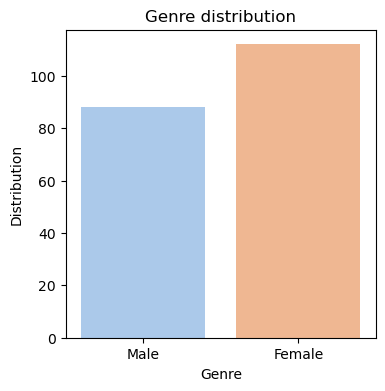

In [374]:
plt.figure(figsize=(4,4))
sns.countplot(data= df, x='Genre', palette="pastel")
plt.title("Genre distribution")
plt.xlabel("Genre")
plt.ylabel("Distribution")

In [375]:
df['Age'].value_counts()

Age
32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: count, dtype: int64

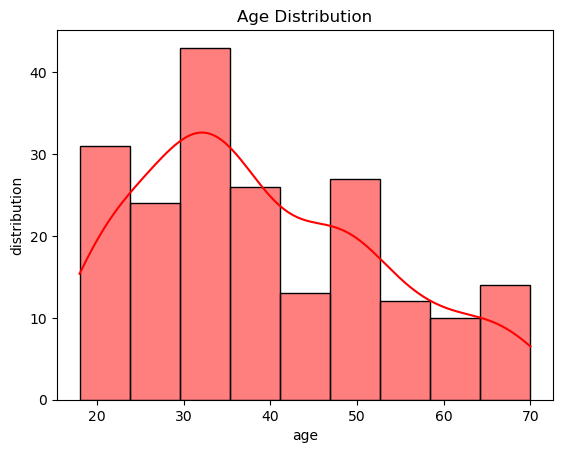

In [376]:
sns.histplot(df['Age'], color ='red', kde=True)
plt.title("Age Distribution")
plt.xlabel("age")
plt.ylabel("distribution")
plt.show()

In [377]:
# maximum people belong to AGE 29-35, whereas minimum lies between 59-65

In [378]:
df['Spending Score (1-100)'].value_counts()

Spending Score (1-100)
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: count, Length: 84, dtype: int64

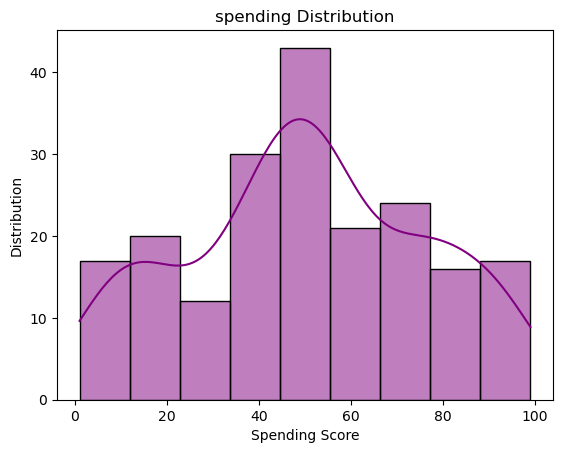

In [379]:
sns.histplot(df['Spending Score (1-100)'],  color ='purple', kde=True)
plt.title("spending Distribution")
plt.xlabel("Spending Score")
plt.ylabel("Distribution")
plt.show()

In [380]:
# the maximum spending score lies in 42-59 whereas least lies in 21-37

In [381]:
df['Annual Income (k$)'].value_counts()

Annual Income (k$)
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: count, Length: 64, dtype: int64

In [382]:
df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

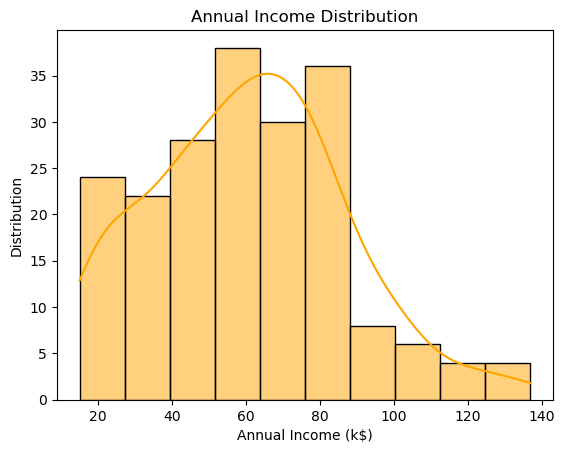

In [383]:
sns.histplot(df['Annual Income (k$)'],  color ='orange', kde=True)
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Distribution")
plt.show()

In [384]:
# the maximum annual income range between 50-62, whereas least people have annual income  betwee 110-138k

 # checking outliers

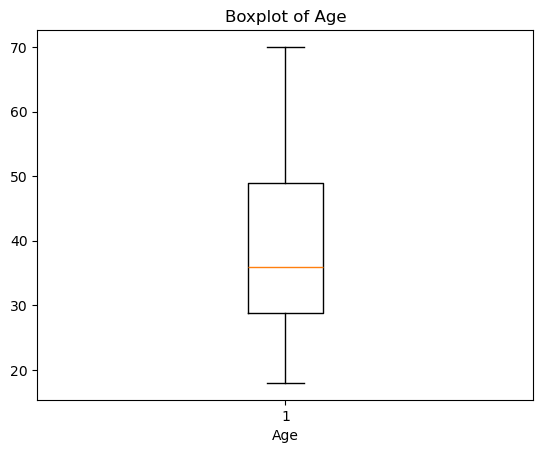

In [386]:
plt.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.xlabel("Age")
plt.show()

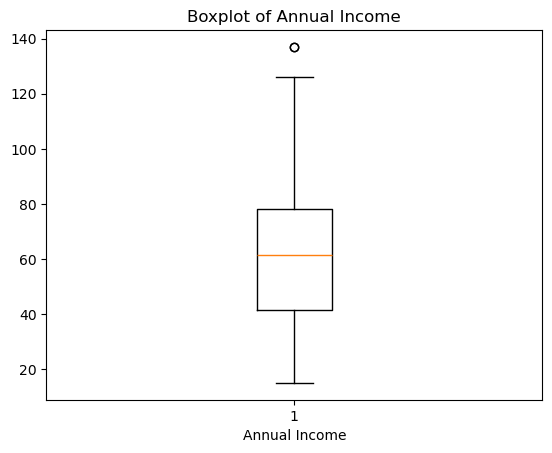

In [387]:
plt.boxplot(x=df['Annual Income (k$)'])
plt.title("Boxplot of Annual Income")
plt.xlabel("Annual Income")  
plt.show()  #cant say it is outlier a person can have 137k annual income 

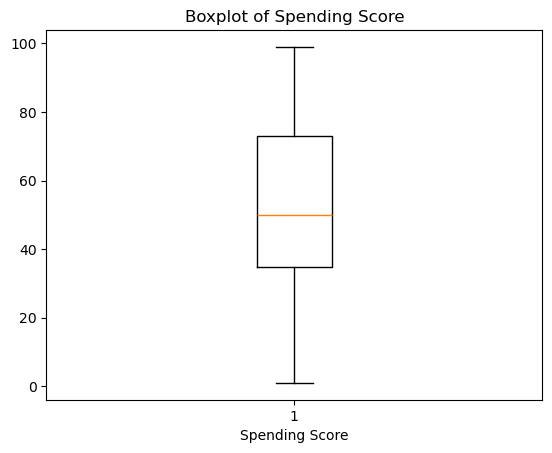

In [388]:
plt.boxplot(x=df['Spending Score (1-100)'])
plt.title("Boxplot of Spending Score")
plt.xlabel("Spending Score")
plt.show()

### CustomerID: This column is an identifier and doesn't provide any meaningful relationship for clustering. It should be dropped because it's just a unique identifier and doesn’t help in grouping customers based on similarities.

In [390]:
df.drop(columns='CustomerID', inplace=True,axis=1)

In [391]:
### before clusteing it is important to scale the variables

### scaling

In [393]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [394]:
scaler=MinMaxScaler()

In [395]:
vars=['Age','Annual Income (k$)','Spending Score (1-100)']
df[vars] = scaler.fit_transform(df[vars])

In [396]:
# encoding
df['Genre']=df['Genre'].map({'Male':1 , 'Female':0})

In [397]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0.019231,0.000000,0.387755
1,1,0.057692,0.000000,0.816327
2,0,0.038462,0.008197,0.051020
3,0,0.096154,0.008197,0.775510
4,0,0.250000,0.016393,0.397959


### modelling 

In [399]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [400]:
 kmeans.labels_

array([2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2,
       3, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [401]:
df['Cluster'] = kmeans.labels_
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0.019231,0.000000,0.387755,2
1,1,0.057692,0.000000,0.816327,2
2,0,0.038462,0.008197,0.051020,3
3,0,0.096154,0.008197,0.775510,2
4,0,0.250000,0.016393,0.397959,3


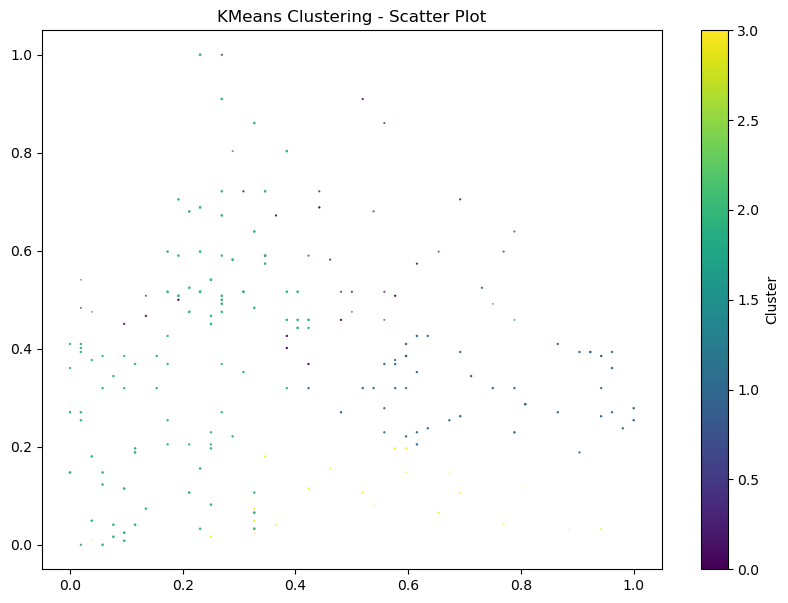

In [469]:
plt.figure(figsize=(10,7))
scatter = plt.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'],df['Cluster'], cmap='viridis')
plt.title("KMeans Clustering - Scatter Plot")
plt.colorbar(scatter, label='Cluster')

### To find the number of clusters (k) using elbow method first 

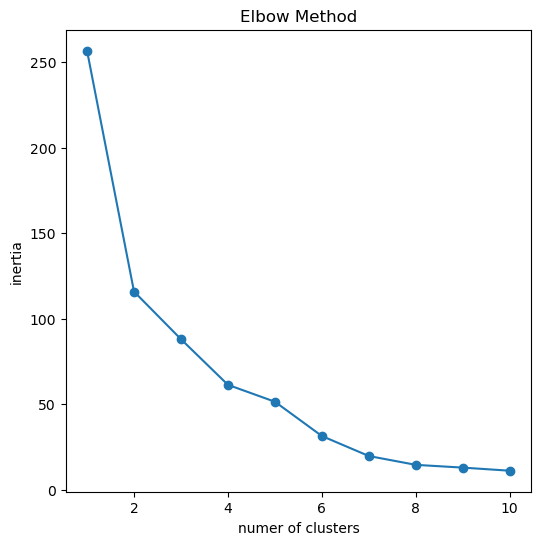

In [404]:
inertia=[]
for k in range (1,11):
    kmeans= KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

### plotting
plt.figure(figsize=(6,6))
plt.plot(range(1,11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("numer of clusters")
plt.ylabel("inertia")
plt.show()


In [405]:
#### it can be clearly see that at k=6 ,the rate of  decrease slows down.

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [407]:
range_n_clusters = [2, 3, 4, 5, 6,7 ]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.4845440319822842
For n_clusters=3, the silhouette score is 0.45203303227569436
For n_clusters=4, the silhouette score is 0.48184528661810305
For n_clusters=5, the silhouette score is 0.5241303788400354
For n_clusters=6, the silhouette score is 0.5817129855681145
For n_clusters=7, the silhouette score is 0.6524734836042044


In [408]:
#help(KMeans)

### final modelling

In [410]:
kmeans=KMeans(n_clusters=6,max_iter=50)
kmeans.fit(df)

KMeans(max_iter=50, n_clusters=6)

In [411]:
l=kmeans.labels_
l

array([0, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 0, 4, 0, 4, 5, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 1, 0, 4, 5,
       4, 5, 1, 5, 5, 5, 1, 0, 5, 1, 1, 1, 1, 1, 5, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 5, 1, 1, 1, 1, 1, 0, 1, 1, 5, 1, 1, 0, 1, 1, 5, 1, 1, 5,
       5, 1, 1, 0, 1, 3, 5, 0, 1, 5, 1, 0, 5, 1, 1, 0, 1, 5, 1, 1, 1, 1,
       1, 5, 3, 0, 5, 5, 1, 1, 1, 1, 0, 3, 2, 0, 3, 2, 3, 0, 1, 0, 3, 0,
       3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 0, 3, 0, 3, 2,
       3, 0, 3, 0, 3, 2, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 0])

In [412]:
df['Cluster_2'] = kmeans.labels_
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_2
0,1,0.019231,0.000000,0.387755,2,0
1,1,0.057692,0.000000,0.816327,2,0
2,0,0.038462,0.008197,0.051020,3,4
3,0,0.096154,0.008197,0.775510,2,5
4,0,0.250000,0.016393,0.397959,3,4


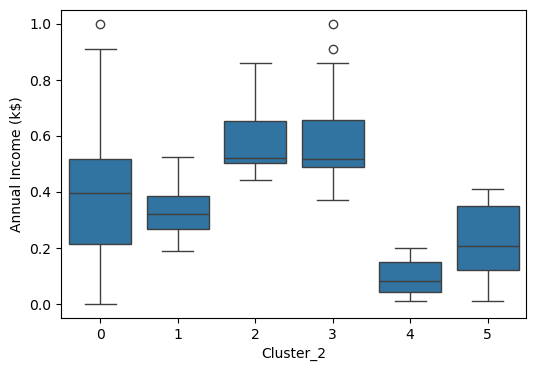

In [413]:
plt.figure(figsize=[6,4])
sns.boxplot(x='Cluster_2', y='Annual Income (k$)', data=df)
plt.show()

In [473]:
## tfor those who have been assigned cluster 2 and 3, the median is almost same.
## Maximum people  with anuual income between 0.22 k$ and 0.5k$ hav been assigned cluster 0.


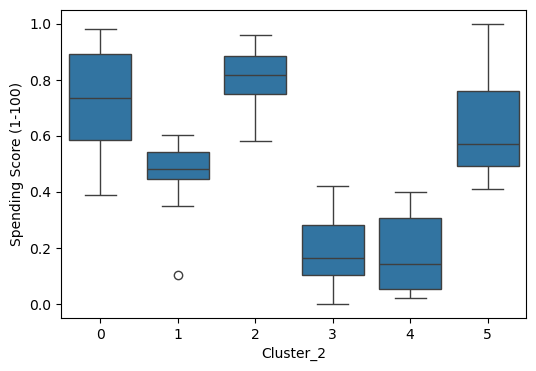

In [414]:
plt.figure(figsize=[6,4])
sns.boxplot(x='Cluster_2', y='Spending Score (1-100)', data=df)
plt.show()

In [475]:
# very less people with spending score around 0l5 to 0.6 are assigned cluster 1, whereas maximum people who hv spending score between 0.6-0.8 are in cluster0.

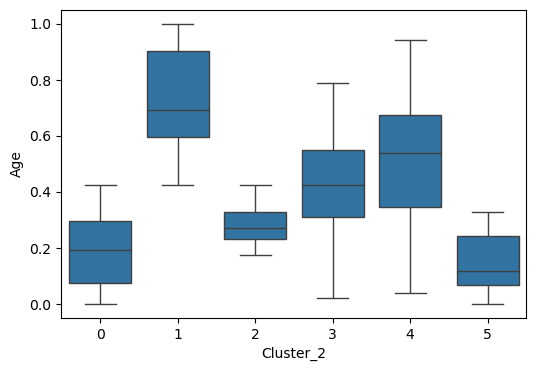

In [415]:
plt.figure(figsize=[6,4])
sns.boxplot(x='Cluster_2', y='Age', data=df)
plt.show()

In [483]:
df_subset = df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
correlation_matrix = df_subset.corr()
correlation_matrix

,Genre,Age,Annual Income (k$),Spending Score (1-100)
Genre,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


In [485]:
# to see the impact of genre, age, annua;l income on spending score.

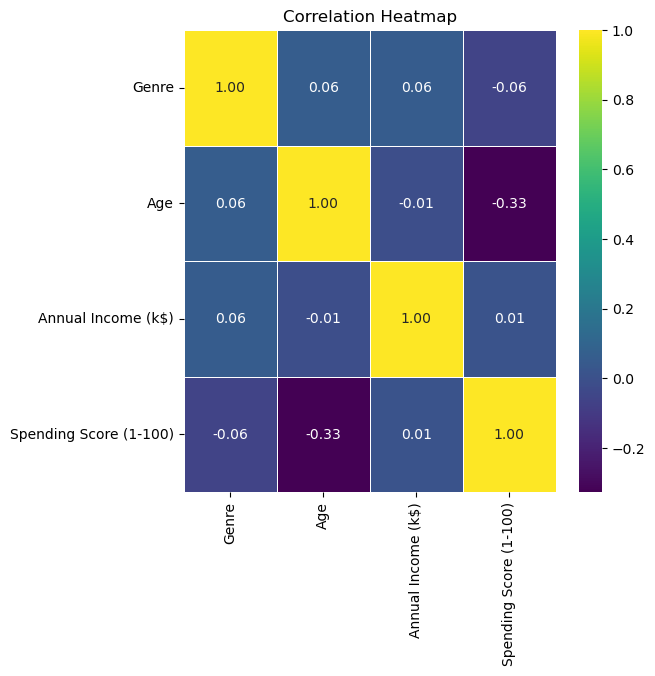

In [493]:
plt.figure(figsize=[6,6])
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#### conclusions
* There is a negative correlation of -0.327 between Age and Spending Score.This suggests that younger individuals tend to have higher spending scores, while older individuals may spend less.
* The correlation between Annual Income (k$) and Spending Score is 0.0099, which is extremely weak. This indicates income has almost no impact on the spending score in this dataset.
* The correlation between Genre and Spending Score is -0.058, which is very weak.